In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st

In [2]:
C = pd.read_csv("resources/by_year.csv")
by_year = C

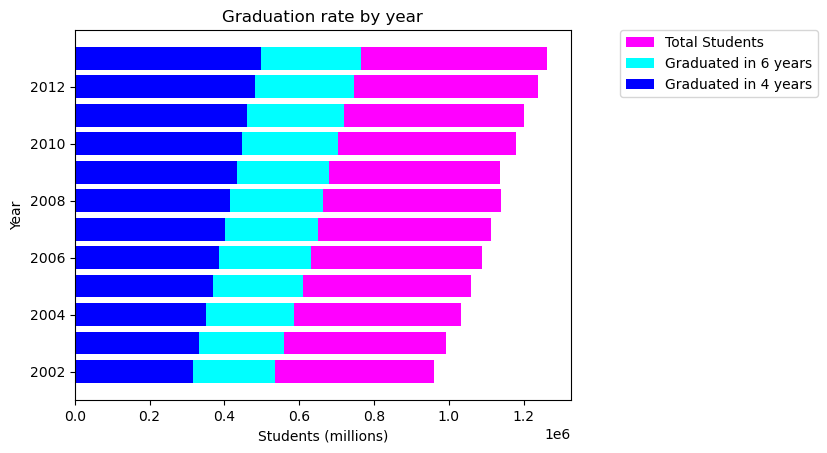

In [23]:
plt.rcdefaults()
fig, ax = plt.subplots()
y=by_year['year']
xtotal= by_year['grad_cohort']
x150= by_year['grad_150']
x100=by_year['grad_100']

ax.barh(y,xtotal, label='Total Students', color='magenta')
ax.barh(y,x150,color= 'cyan', label='Graduated in 6 years')
ax.barh(y,x100,color='blue', label='Graduated in 4 years')

ax.set_xlabel('Students (millions)')
ax.set_ylabel('Year')
ax.set_title('Graduation rate by year')
ax.legend(loc='best')
ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)

plt.savefig("Images/Graduation_rate_by_year.png")

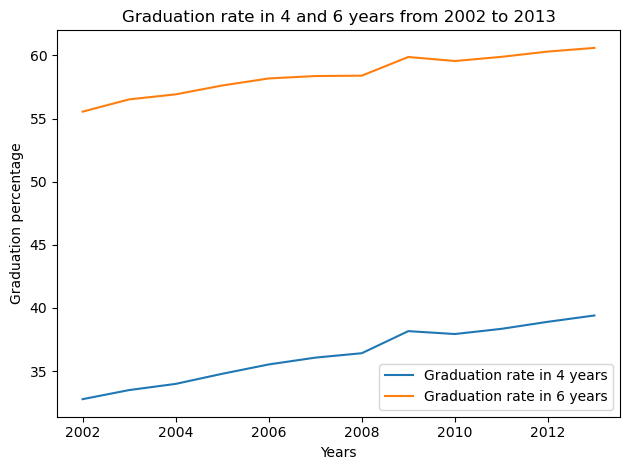

In [24]:
#by_year2
grad_rate100= (by_year['grad_100']/by_year['grad_cohort'])*100
grad_rate100= round(grad_rate100,2)
grad_rate150= (by_year['grad_150']/by_year['grad_cohort'])*100
grad_rate150= round(grad_rate150,2)
years= by_year['year']
plt.plot(years, grad_rate100, label= 'Graduation rate in 4 years')
plt.plot(years, grad_rate150, label= 'Graduation rate in 6 years')
plt.legend(loc='best')
plt.xlabel('Years')
plt.ylabel('Graduation percentage')
plt.title("Graduation rate in 4 and 6 years from 2002 to 2013")
plt.tight_layout()
#plt.show()
plt.savefig("Images/Graduation_rate_in_4_and_6_years_from_2002_to_2013.png")

The r-squared is: 0.9731610859241147


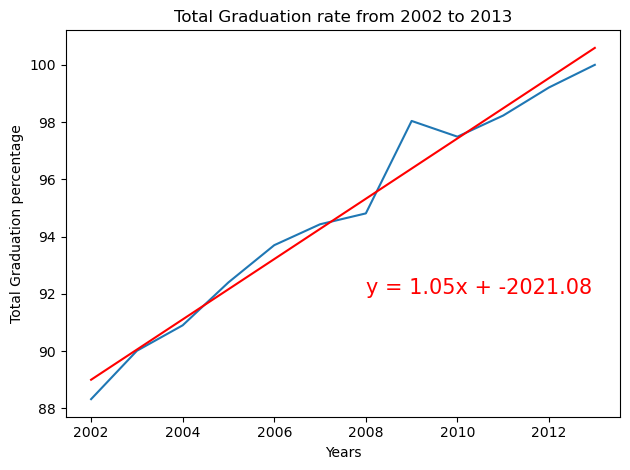

In [25]:
total_grad_rate = grad_rate100 + grad_rate150
fig= plt.plot(kind='line')
plt.plot(years ,total_grad_rate)
plt.xlabel('Years')
plt.ylabel('Total Graduation percentage')
plt.title("Total Graduation rate from 2002 to 2013")
plt.tight_layout()

#linear regression on total graduation rate
# Add the linear regression equation and line to plot

(slope, intercept, rvalue, pvalue, stderr) = linregress(years, total_grad_rate)
regress_values = years * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(years,regress_values,"r-")
plt.annotate(line_eq,(2008,92),fontsize=15,color="red")
#plt.show()
plt.savefig("Images/Total_Graduation_rate_from_2002_to_2013.png")
print(f"The r-squared is: {rvalue**2}")

In [8]:
Inst = pd.read_csv('resources/Inst.csv')
Inst_control = Inst[['unitid', 'chronname', 'city', 'state', 'level', 'control','student_count', 'aid_value', 
            'grad_100_value', 'grad_150_value']]

In [9]:
public = Inst.loc[Inst['control'] == 'Public']
public_grad_mean = round(public['grad_100_value'].mean(), 2)
public_grad150_mean = round(public['grad_150_value'].mean(), 2)
print(f"{public_grad_mean}, {public_grad150_mean}")

27.25, 49.35


In [10]:
profit = Inst.loc[Inst['control'] == 'Private for-profit']
profit_grad_mean = round(profit['grad_100_value'].mean(), 2)
profit_grad150_mean = round(profit['grad_150_value'].mean(), 2)
print(f"{profit_grad_mean}, {profit_grad150_mean}")

38.4, 46.39


In [11]:
nonprofit = Inst.loc[Inst['control'] == 'Private not-for-profit']
nonprofit_grad_mean = round(nonprofit['grad_100_value'].mean(), 2)
nonprofit_grad150_mean = round(nonprofit['grad_150_value'].mean(), 2)
print(f"{nonprofit_grad_mean}, {nonprofit_grad150_mean}")

45.47, 57.77


Public Graduation Rates: 27.25% in 4 years, 49.35% in 6 years.
Private For Profit Graduation Rates: 38.4% in 4 years, 46.39% in 6 years.
Private Non-Profit Graduation Rates: 45.47% in 4 years, 57.77% in 6 years.


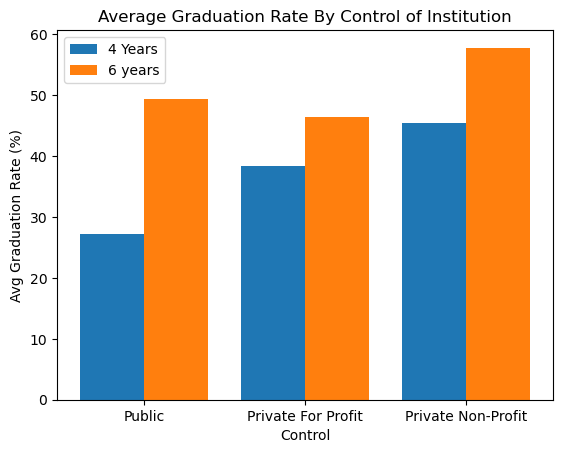

In [26]:
first_gradvals = [public_grad_mean, profit_grad_mean, nonprofit_grad_mean]
second_gradvals = [public_grad150_mean, profit_grad150_mean, nonprofit_grad150_mean]

labels = ['Public', 'Private For Profit', 'Private Non-Profit']
ticks = np.arange(len(labels))
plt.bar(ticks - 0.2, first_gradvals, 0.4)
plt.bar(ticks + 0.2, second_gradvals, 0.4)
plt.xticks(ticks, labels)
plt.legend(['4 Years', '6 years'], loc='best')
plt.title('Average Graduation Rate By Control of Institution')
plt.xlabel('Control')
plt.ylabel('Avg Graduation Rate (%)')
#plt.show()
print(f"Public Graduation Rates: {public_grad_mean}% in 4 years, {public_grad150_mean}% in 6 years.")
print(f"Private For Profit Graduation Rates: {profit_grad_mean}% in 4 years, {profit_grad150_mean}% in 6 years.")
print(f"Private Non-Profit Graduation Rates: {nonprofit_grad_mean}% in 4 years, {nonprofit_grad150_mean}% in 6 years.")
plt.savefig("Images/Average_Graduation_Rate_By_Control_of_Institution.png")

Public Graduation Rates: 27.03% in 4 years, 57.03% in 6 years.
Private For Profit Graduation Rates: nan% in 4 years, nan% in 6 years.
Private Non-Profit Graduation Rates: 51.73% in 4 years, 64.53% in 6 years.


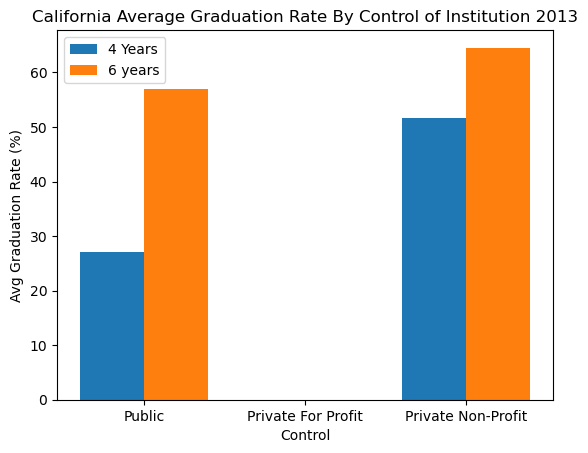

In [27]:
California = pd.read_csv("resources/California.csv")
CA_df = California

ncpublic = CA_df.loc[CA_df['control'] == 'Public']
ncprofit = CA_df.loc[CA_df['control'] == 'Private for-profit']
ncnonprofit = CA_df.loc[CA_df['control'] == 'Private not-for-profit']

ncpublic_4grad_rate = round(ncpublic['grad_100'] / ncpublic['grad_cohort'], 2) * 100
ncpublic_6grad_rate = round(ncpublic['grad_150'] / ncpublic['grad_cohort'], 2) * 100

ncprofit_4grad_rate = round(ncprofit['grad_100'] / ncprofit['grad_cohort'], 2) * 100
ncprofit_6grad_rate = round(ncprofit['grad_150'] / ncprofit['grad_cohort'], 2) * 100

ncnonprofit_4grad_rate = round(ncnonprofit['grad_100'] / ncnonprofit['grad_cohort'], 2) * 100
ncnonprofit_6grad_rate = round(ncnonprofit['grad_150'] / ncnonprofit['grad_cohort'], 2) * 100

ncpublic_grad_mean = round(ncpublic_4grad_rate.mean(), 2)
ncpublic_grad150_mean = round(ncpublic_6grad_rate.mean(), 2)

ncprofit_grad_mean = round(ncprofit_4grad_rate.mean(), 2)
ncprofit_grad150_mean = round(ncprofit_6grad_rate.mean(), 2)


ncnonprofit_grad_mean = round(ncnonprofit_4grad_rate.mean(), 2)
ncnonprofit_grad150_mean = round(ncnonprofit_6grad_rate.mean(), 2)


first_ncgradvals = [ncpublic_grad_mean, ncprofit_grad_mean, ncnonprofit_grad_mean]
second_ncgradvals = [ncpublic_grad150_mean, ncprofit_grad150_mean, ncnonprofit_grad150_mean]

labels = ['Public', 'Private For Profit', 'Private Non-Profit']
ticks = np.arange(len(labels))
plt.bar(ticks - 0.2, first_ncgradvals, 0.4)
plt.bar(ticks + 0.2, second_ncgradvals, 0.4)
plt.xticks(ticks, labels)
plt.legend(['4 Years', '6 years'], loc='best')
plt.title('California Average Graduation Rate By Control of Institution 2013')
plt.xlabel('Control')
plt.ylabel('Avg Graduation Rate (%)')
#plt.show()
print(f"Public Graduation Rates: {ncpublic_grad_mean}% in 4 years, {ncpublic_grad150_mean}% in 6 years.")
print(f"Private For Profit Graduation Rates: {ncprofit_grad_mean}% in 4 years, {ncprofit_grad150_mean}% in 6 years.")
print(f"Private Non-Profit Graduation Rates: {ncnonprofit_grad_mean}% in 4 years, {ncnonprofit_grad150_mean}% in 6 years.")

plt.savefig("Images/CaliforniaAverageGraduationRateByControlOfInstitution2013.png")

The r-squared is: 0.5937351931789805
The line equation is: y = 0.0x + 1.97
The correlation is 0.77


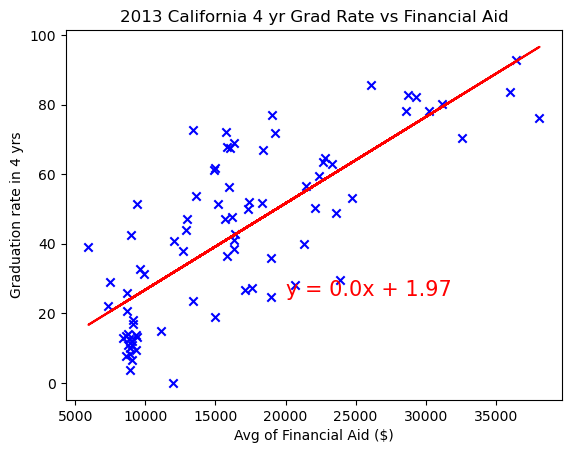

In [28]:
CA_df = Inst.loc[Inst['state'] == 'California']

x_value = CA_df['aid_value']
y_value = CA_df['grad_100_value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, color='b', marker='x')
plt.plot(x_value, regress_value, "r-")
plt.ylabel('Graduation rate in 4 yrs')
plt.xlabel('Avg of Financial Aid ($)')
plt.title('2013 California 4 yr Grad Rate vs Financial Aid')
plt.annotate(line_eq, (20000,25), fontsize=15, color="red")
#plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f"The line equation is: {line_eq}")

correlation = st.pearsonr(x_value, y_value)
print(f'The correlation is {round(correlation[0],2)}')
plt.savefig("Images/California_4_yr_Grad_Rate_vs_Financial_Aid.png")

The r-squared is: 0.49197734353971045
The correlation is 0.7


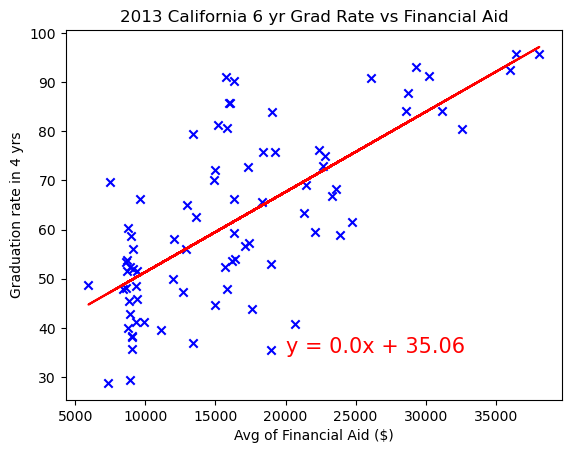

In [29]:
x_value = CA_df['aid_value']
y_value = CA_df['grad_150_value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, color='b', marker='x')
plt.plot(x_value, regress_value, "r-")
plt.ylabel('Graduation rate in 4 yrs')
plt.xlabel('Avg of Financial Aid ($)')
plt.title('2013 California 6 yr Grad Rate vs Financial Aid')
plt.annotate(line_eq, (20000,35), fontsize=15, color="red")
#plt.show()
print(f"The r-squared is: {rvalue**2}")
#print(f"The line equation is: {line_eq}")
correlation = st.pearsonr(x_value, y_value)
print(f'The correlation is {round(correlation[0],2)}')
plt.savefig("Images/California_6_yr_Grad_Rate_vs_Financial_Aid.png")

The r-squared is: 0.671744731074603
The line equation is: y = 0.13x + -97.99
The correlation is 0.82


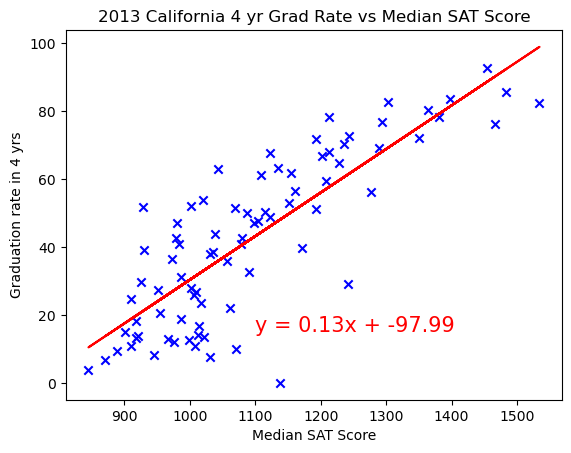

In [30]:
x_value = CA_df['med_sat_value']
y_value = CA_df['grad_100_value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, color='b', marker='x')
plt.plot(x_value, regress_value, "r-")
plt.ylabel('Graduation rate in 4 yrs')
plt.xlabel('Median SAT Score')
plt.title('2013 California 4 yr Grad Rate vs Median SAT Score')
plt.annotate(line_eq, (1100,15), fontsize=15, color="red")
#plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f"The line equation is: {line_eq}")

correlation = st.pearsonr(x_value, y_value)
print(f'The correlation is {round(correlation[0],2)}')
plt.savefig("Images/California_4_yr_Grad_Rate_vs_Median_SAT_Score.png")

The r-squared is: 0.7856672700643359
The line equation is: y = 0.1x + -47.92
The correlation is 0.89
Hypothesis testing:
Null hypothesis: SAT Scores do not impact graduation rates.
p-value is: 3.807829927024991e-28 therefore we can confirm that the SAT has a direct correlation to graduation rates.


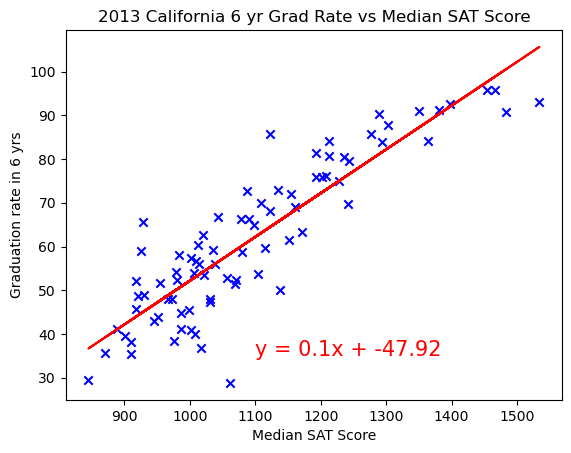

In [31]:
x_value = CA_df['med_sat_value']
y_value = CA_df['grad_150_value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, color='b', marker='x')
plt.plot(x_value, regress_value, "r-")
plt.ylabel('Graduation rate in 6 yrs')
plt.xlabel('Median SAT Score')
plt.title('2013 California 6 yr Grad Rate vs Median SAT Score')
plt.annotate(line_eq, (1100,35), fontsize=15, color="red")
#plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f"The line equation is: {line_eq}")

correlation = st.pearsonr(x_value, y_value)
print(f'The correlation is {round(correlation[0],2)}')
plt.savefig("Images/California_6_yr_Grad_Rate_vs_Median_SAT_Score.png")
print("Hypothesis testing:")
print('Null hypothesis: SAT Scores do not impact graduation rates.')
print(f'p-value is: {correlation[1]} therefore we can confirm that the SAT has a direct correlation to graduation rates.')

In [33]:
California = pd.read_csv("resources/California.csv")

CA_df = California


In [34]:
CA = CA_df.sum().reset_index()
CA

,index,0
0,Unnamed: 0,181824
1,unitid,11389403
2,state,CaliforniaCaliforniaCaliforniaCaliforniaCalifo...
3,year,163053
4,control,Private not-for-profitPrivate not-for-profitPr...
5,grad_cohort,108655.0
6,grad_100,42673.0
7,grad_150,71849.0


In [35]:
dict={"totals": [42673.0 , 71849.0], "labels":["grad_100", "grad_150"]}

California = pd.DataFrame(dict)



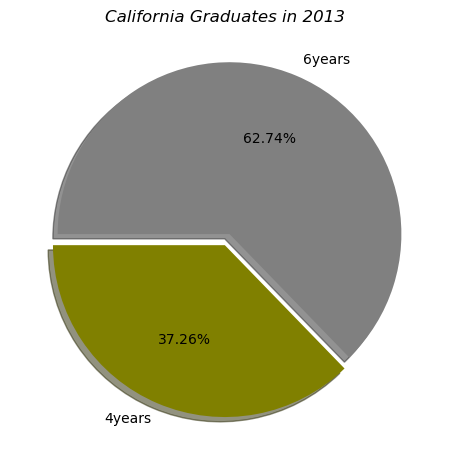

In [36]:
labels = [ "4years", "6years"]

y = California["totals"]

colors = ["Olive","Grey"]

explode = (0,0.07)

plt.pie(y, explode=explode, colors = colors, labels=labels,
autopct='%1.2f%%', shadow=True, startangle=180)

plt.title(label="California Graduates in 2013",loc="center",fontstyle='italic')

plt.tight_layout()

#plt.show()
plt.savefig("Images/CaliforniaGraduatesPie.png")